# Back Propagation Neural Network on Iris dataset

### report no.1 Reza Sahle, Alireza Rajabi

Backpropagation efficiently computes the gradient of the loss function with respect to the weights of the network for a single input-output example. This makes it feasible to use gradient methods for training multi-layer networks, updating weights to minimize loss; commonly one uses gradient descent or variants such as stochastic gradient descent

here we have 150 samples that has labeled on four featuers,we used multi layer perceptrone and Back propagation learning role which help us to update our weights in each epochs to find the better acuuracy. to many epochs tends to overfitting, that in statistical we said low bias and high variance so we cant find a good model for test dataset, and low number of epochs mybe cant fit the model on our data and in other word it cause low variance and high bias, so we tried different number of epechs to find the best trade-off on bias and variance.

also we have other optimizing parameters such as learning rate (in our code shown as q) and momentum (shown as momen) and most of importance we have diffrent kinds of activation functions. ( here we uesd RelU, sigmoid and tanh).

#### first of all we import some librarys:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### since our lables in Iris datasets (species) was orderd, we shuffle them.

In [2]:
from sklearn.utils import shuffle

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Iris.csv')

#### we do some normalization on our features in datasets:

In [5]:
df_norm  = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].apply(lambda x: (x - x.min())/(x.max() - x.min()))

#### in pandas library, we have a function called get_dummies that create dummy variables for categorical feature

In [6]:
species= pd.get_dummies(df['Species'])

In [7]:
df_norm = pd.concat([df_norm,species],axis=1)

In [8]:
df_norm.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


#### we convert our dataframe into a matrix:

In [9]:
data=df_norm.values

In [10]:
data=shuffle(data)
print(data)

[[0.38888889 0.33333333 0.52542373 ... 0.         1.         0.        ]
 [0.41666667 0.83333333 0.03389831 ... 1.         0.         0.        ]
 [0.66666667 0.54166667 0.79661017 ... 0.         0.         1.        ]
 ...
 [0.47222222 0.08333333 0.50847458 ... 0.         1.         0.        ]
 [0.36111111 0.20833333 0.49152542 ... 0.         1.         0.        ]
 [0.94444444 0.25       1.         ... 0.         0.         1.        ]]


#### now we introduced our activation functions and their derivations:

In [11]:
#activation function (sigmoid)
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [12]:
#derivation of activation function(sigmoid)
def der_sigmoid(x):
    return x * (1.0-x)

In [13]:
#activation function
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [14]:
def relu(X):
    return np.maximum(0,X)

In [15]:
def der_relu(X):
    return np.where(X <= 0,0,1)

#### we set 100 samples for our training set:

In [16]:
#input layer
X_train = data[:100,:4]
#X_train=np.array([[5.1,3.5,1.4,0.2],
#            [5.6,2.5,3.9,1.1],
#            [5.9,3.0,5.1,1.8]])
X_train.shape

(100, 4)

In [17]:
#output layer
y_train = data[:100,4:]
#y_train=np.array([[1,0,0],
#            [0,1,0],
#            [0,0,1]])
y_train.shape

(100, 3)

#### and 50 samples for our validation set: 

In [18]:
X_test = data[100:,:4]
#X_train=np.array([[5.1,3.5,1.4,0.2],
#            [5.6,2.5,3.9,1.1],
#            [5.9,3.0,5.1,1.8]])
X_test.shape

(50, 4)

In [19]:
y_test = data[100:,4:]
#y_train=np.array([[1,0,0],
#            [0,1,0],
#            [0,0,1]])
y_test.shape

(50, 3)

In [20]:
np.random.seed()

#### here we initilized our weights. the weights that we generate are in interval of [0,1] 

why [0,1] intervals? in sigmoid activation functionour out put will be in this interval, so we set initial wghits on this interval for some reason.

#### and also we peresents number of neurons here.

In [21]:
#weights for first and second layer
w1_1 = np.random.uniform(0,1,(4,9))
#w1_1= 2 * np.random.random((4,3)) -1

In [22]:
wb1=np.random.uniform(0,1,(1,9))

In [23]:
#weights for first and second layer
w2_2 = np.random.uniform(0,1,(9,3))
#w1_1= 2 * np.random.random((4,3)) -1

In [24]:
wb2=np.random.uniform(0,1,(1,3))

#### the momentum parameter will regularize the velocity of updating weights.

In [54]:
vel1=np.zeros_like(w1_1)

In [55]:
vel2=np.zeros_like(w2_2)

#### bias in every layer in theory should make the accuracy better, but here we reach the 93% accuracy without bias.

what is the bias? the intercept should help to set a better model.

In [27]:
b1=np.zeros((100,1))+1

In [28]:
b2=np.zeros((100,1))+1

 goal of this below 2 lines: since we make random weights, we cant say that our changes on parameter changes helping us, so we hold the values every time to make the results only related to our tuning parameters.

In [86]:
w1=np.copy(w1_1)
w2=np.copy(w2_2)

##### first we calculate the forward propagation then we copmutes the cost functions (witch is the mean squared error) and finally we calculate the back propagation.

In [87]:
lis = []
lis_test= []
for i in range(10000):

    #forward propagation
    
    
    #second layer output 
    z2=np.dot(X_train,w1)+np.dot(b1,wb1)
    a2=sigmoid(z2)
    
    
    #final layer output 

    z3=np.dot(a2,w2)+np.dot(b2,wb2)
    a3=sigmoid(z3)    
    
    
    #Backpropagation
    
    cost = 0.5 * (y_train - a3)**2
    lis.append(np.sum(cost))
    
    #print('Epochs',i,':',np.sum(cost))
    #derviation of cost function
    
    
    delta3 = (y_train - a3) * (der_sigmoid(a3))
    gamma2 = np.dot(a2.T,delta3)
    
    delta2 = np.dot(delta3,w2.T) * (der_sigmoid(a2))
    gamma1 = np.dot(X_train.T,delta2) 
    
    
    
    
    
    #forward propagation test
    
    
    #second layer output 
    z2_t=np.dot(X_test,w1)
    a2_t=sigmoid(z2_t)
    
    
    #final layer output 

    z3_t=np.dot(a2_t,w2)
    a3_t=sigmoid(z3_t)    
    
    
    #Backpropagation
    
    cost = 0.5 * (y_test - a3_t)**2
    lis_test.append(np.sum(cost))
    
    
    
    #updating the weights

    #learning rate
    q=0.15
    momen=0.1
    
    vel1=momen*vel1+q*(gamma1)
    vel2=momen*vel2+q*(gamma2)
    vel1.shape
    #w1 += (q*(1/100)*gamma1)
    w1= w1+(1/100)*vel1
    #w2 += (q*(1/100)*gamma2)
    w2= w2+(1/100)*vel2
        


print('the prediction:\n',a3[:8])
print('\n the output:\n',y_train[:8])
print('the cost is:\n',np.sum(cost))

the prediction:
 [[4.34785108e-02 4.96289183e-01 2.70750387e-01]
 [9.91944819e-01 8.31219053e-02 2.74230270e-05]
 [8.15262955e-03 3.50716883e-01 8.20909163e-01]
 [1.31076140e-02 4.64347560e-01 6.67377283e-01]
 [1.24113309e-02 5.53355892e-01 6.53886706e-01]
 [9.76706188e-01 1.36619728e-01 1.10072629e-04]
 [9.95438206e-03 3.51917627e-01 7.79704977e-01]
 [9.94024067e-01 7.80355780e-02 1.96028446e-05]]

 the output:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
the cost is:
 6.118390824130619


##### validation forward propagation.

In [71]:
#forward propagation
    
#second layer output with 3 neuron
z2=np.dot(X_test,w1)
a2=sigmoid(z2)
    
    
#final layer output with 3 neuron

z3=np.dot(a2,w2)
a3=sigmoid(z3)    
    

print('the prediction:\n',a3[:5])
print('\n the output:\n',y_test[:5])

the prediction:
 [[9.54987014e-01 8.50678036e-02 1.25378435e-04]
 [3.88105861e-03 2.88856505e-01 7.81142682e-01]
 [9.87655611e-01 4.27816585e-02 2.42751213e-05]
 [6.11257879e-03 3.18945951e-01 6.12370899e-01]
 [3.62484243e-03 3.02551274e-01 8.01227953e-01]]

 the output:
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


#### since our outputs has a probable values we set them to unitary vectors such as below:

In [36]:
from numpy import linalg as LA

In [72]:
arr = np.zeros((a3.shape[0],a3.shape[1]))
for i in range(a3.shape[0]):
    for j in range(a3.shape[1]):
        if LA.norm(a3[i],np.inf)==a3[i,j]:
            arr[i,j]=1
        else:
            arr[i,j]=0
            
print(arr)
#print(LA.norm(a4[0],np.inf))
#print(a4[0])
#print(a4[0,0])

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### to calculate the accuracy:

In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [73]:
print(accuracy_score(y_test,arr))
print(classification_report(y_test,arr))

0.82
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.47      0.64        17
           2       0.65      1.00      0.79        17

   micro avg       0.82      0.82      0.82        50
   macro avg       0.88      0.82      0.81        50
weighted avg       0.88      0.82      0.81        50
 samples avg       0.82      0.82      0.82        50



#### mean squared error for train set and test set:

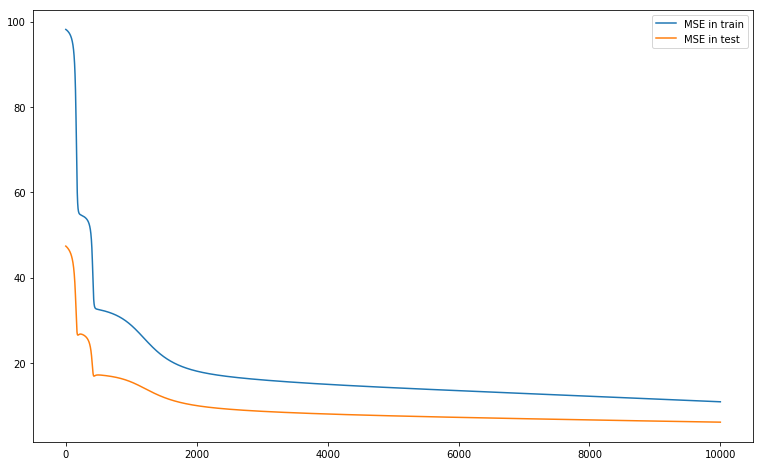

In [88]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(range(0,10000),lis,label='MSE in train')
ax.plot(range(0,10000),lis_test,label='MSE in test')
ax.legend(loc=0)